In [115]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cd /content/drive/My\ Drive




# Logistic Regression with Linear and Polynomial Features

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

## Reading the data

In [118]:
data = pd.read_csv("./drive/My Drive/Data/small_ohe.csv")
data.head()

age  default  ...  day_of_week_tue  day_of_week_wed
0  0.171429        1  ...                0                0
1  0.300000        1  ...                0                0
2  0.100000        1  ...                0                1
3  0.285714        1  ...                0                0
4  0.414286        1  ...                0                0

[5 rows x 56 columns]

In [119]:
data.columns

Index(['age', 'default', 'housing', 'loan', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y', 'pdays2', 'job_admin.',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'marital_unknown', 'education_basic.4y', 'education_basic.6y',
       'education_basic.9y', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'contact_cellular', 'contact_telephone',
       'month_apr', 'month_aug', 'month_dec', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'day_of_week_fri', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_w

In [0]:
# Saperating features and result vectors
X = data.drop('y', axis=1).values
y = data['y'].values

### Test Train Split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [0]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)

In [0]:
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

## Logistic Regression with Linear Features

In [124]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Logistic Regression with Polynomial Features of degree=2

In [125]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Logistic Regression with Polynomial Features of degree=3

In [126]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## Comparing the results

In [127]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

Metric  ...  Logistic Regression with Features of Degree=3
0   Accuracy  ...                                       0.922584
1  Precision  ...                                       0.988920
2     Recall  ...                                       0.872150
3   F1 Score  ...                                       0.926871

[4 rows x 4 columns]

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Model evaluation after appliying PCA

In [128]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.90)
x_pca = pca.fit_transform(X)
x_pca.shape

(7276, 24)

### Observation : To capture 90% of variance we need only 24 Features out of 56

In [0]:
X_train, X_test, y_train, y_test = train_test_split(x_pca, y, test_size=0.30, random_state=42)

In [0]:
poly_features_1 = PolynomialFeatures(degree=1)
poly_features_2 = PolynomialFeatures(degree=2)
poly_features_3 = PolynomialFeatures(degree=3)
X_train_poly1 = poly_features_1.fit_transform(X_train)
X_train_poly2 = poly_features_2.fit_transform(X_train)
X_train_poly3 = poly_features_3.fit_transform(X_train)

In [0]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly1, y_train)
y_test_predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
acc1 = metrics.accuracy_score(y_test_predict, y_test)
pre1 = metrics.precision_score(y_test_predict,y_test)
rec1 = metrics.recall_score(y_test_predict,y_test)
f1_1 = metrics.f1_score(y_test_predict,y_test)

In [132]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly2, y_train)
y_test_predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
acc2 = metrics.accuracy_score(y_test_predict, y_test)
pre2 = metrics.precision_score(y_test_predict,y_test)
rec2 = metrics.recall_score(y_test_predict,y_test)
f1_2 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [133]:
logisticRegr = LogisticRegression()
logisticRegr.fit(X_train_poly3, y_train)
y_test_predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
acc3 = metrics.accuracy_score(y_test_predict, y_test)
pre3 = metrics.precision_score(y_test_predict,y_test)
rec3 = metrics.recall_score(y_test_predict,y_test)
f1_3 = metrics.f1_score(y_test_predict,y_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [134]:
table = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1 Score'],
    'Logistic Regression with Linear Features': [acc1, pre1, rec1, f1_1],
    'Logistic Regression with Features of Degree=2' : [acc2, pre2, rec2, f1_2],
    'Logistic Regression with Features of Degree=3' : [acc3, pre3, rec3, f1_3]})
table

Metric  ...  Logistic Regression with Features of Degree=3
0   Accuracy  ...                                       0.904260
1  Precision  ...                                       0.975069
2     Recall  ...                                       0.852989
3   F1 Score  ...                                       0.909953

[4 rows x 4 columns]

## Observation : We can see that with just 24 Features instead 56 Features we can get the same accuracy

### ----------------------------------------------------------------------------------------------------------------------------------------------------------

# Plotting the ROC Curve for Better Visualization

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [136]:
logisticRegr = LogisticRegression()
poly_features_2 = PolynomialFeatures(degree=2)
X_poly2 = poly_features_2.fit_transform(X_train)
logisticRegr.fit(X_poly2, y_train)
predict = logisticRegr.predict(poly_features_2.fit_transform(X_test))
#data['predict'] = predict
TP2 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN2 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP2 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN2 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P2 = np.sum(y_test)
N2 = len(y_test) - P2
phat2 = logisticRegr.predict_proba(poly_features_2.fit_transform(X_test))[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [137]:
logisticRegr = LogisticRegression()
poly_features_1 = PolynomialFeatures(degree=1)
X_poly1 = poly_features_1.fit_transform(X_train)
logisticRegr.fit(X_poly1, y_train)
predict = logisticRegr.predict(poly_features_1.fit_transform(X_test))
#data['predict'] = predict
TP1 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN1 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP1 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN1 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P1 = np.sum(y_test)
N1 = len(y_test) - P1
phat1 = logisticRegr.predict_proba(poly_features_1.fit_transform(X_test))[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [138]:
logisticRegr = LogisticRegression()
poly_features_3 = PolynomialFeatures(degree=3)
X_poly3 = poly_features_3.fit_transform(X_train)
logisticRegr.fit(X_poly3, y_train)
predict = logisticRegr.predict(poly_features_3.fit_transform(X_test))
#data['predict'] = predict
TP3 = np.sum([(c==1 and p==1) for c,p in zip(y_test,predict)])
TN3 = np.sum([(c==0 and p==0) for c,p in zip(y_test,predict)])
FP3 = np.sum([(c==0 and p==1) for c,p in zip(y_test,predict)])
FN3 = np.sum([(c==1 and p==0) for c,p in zip(y_test,predict)])
P3 = np.sum(y_test)
N3 = len(y_test) - P3
phat3 = logisticRegr.predict_proba(poly_features_3.fit_transform(X_test))[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


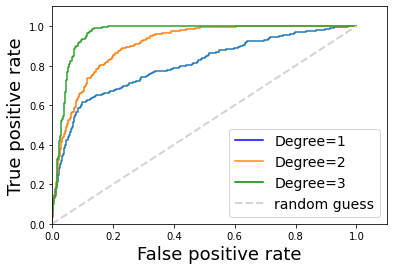

In [139]:
from sklearn.metrics import roc_curve
fpr1, tpr1, thresholds1 = roc_curve(y_test, phat1)
plt.plot(fpr1, tpr1)
plt.plot(FP1/N1, TP1/P1, label = 'Degree=1', color='blue')

fpr2, tpr2, thresholds2 = roc_curve(y_test, phat2)
plt.plot(fpr2, tpr2)
plt.plot(FP2/N2, TP2/P2, label = 'Degree=2', color='darkorange')

fpr3, tpr3, thresholds3 = roc_curve(y_test, phat3)
plt.plot(fpr3, tpr3)
plt.plot(FP3/N3, TP3/P3, label = 'Degree=3', color='green')

x = np.linspace(0,1,num=50)
plt.plot(x, x, color='lightgrey', linestyle='--', marker='',lw=2, label='random guess')
plt.legend(fontsize = 14)
plt.xlabel('False positive rate', fontsize = 18)
plt.ylabel('True positive rate', fontsize = 18)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.show()